In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import bootstrap
from config import Dataset
from collections import defaultdict
import os

In [2]:
result_files = {
    Dataset.PROTEINS: "study_outputs/dataset-PROTEINS/results.json",
    Dataset.ENZYMES: "study_outputs/dataset-ENZYMES/results.json",
}

In [3]:
result_dict = {}
for ds, path in result_files.items():
    with open(path, "r") as f:
        result_dict[ds] = json.load(f)

In [7]:
formats = {
    "QFE-exp": "mo",
    "QFE-probs": "ro",
    "MLP-2^D": "bs",
    "MLP-D": "cs",
    "none": "kx"
}

def plot_stats(results, utility_fn, plot_file_name=None):
    fig, ax = plt.subplots()
    for embedder, embedder_stats in results["stats"].items():
        ax.errorbar(
            embedder_stats[utility_fn]["param_counts"]["mean"],
            embedder_stats[utility_fn]["accuracies"]["mean"],
            xerr=embedder_stats[utility_fn]["param_counts"]["error"],
            yerr=embedder_stats[utility_fn]["accuracies"]["error"],
            fmt=formats[embedder],
            label=embedder
        )
    ax.legend(loc="best")
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    # ax.set_xscale('log')
    ax.set_xlabel('Number of parameters')
    ax.set_ylabel('Accuracy')
    if plot_file_name:
        os.makedirs("./generated_images", exist_ok=True)
        fig.savefig(f"./generated_images/{plot_file_name}.svg", format="svg", dpi=1200)
    plt.show()

Dataset: PROTEINS, Utility Function: best_all


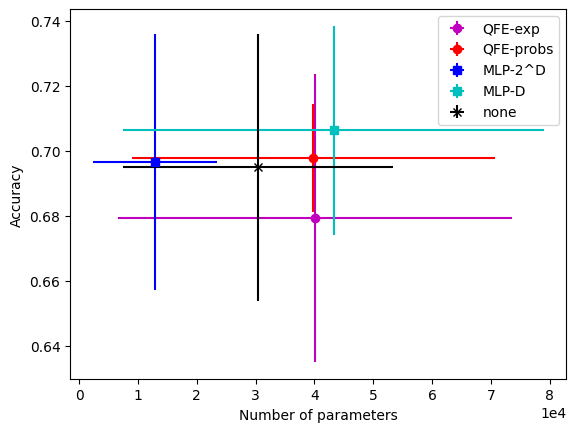

Dataset: PROTEINS, Utility Function: best_acc


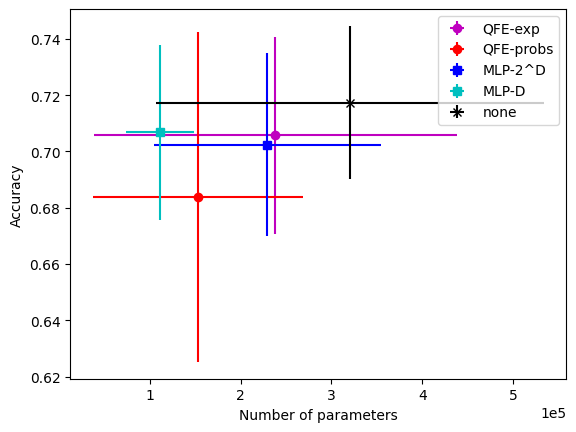

Dataset: PROTEINS, Utility Function: low_params


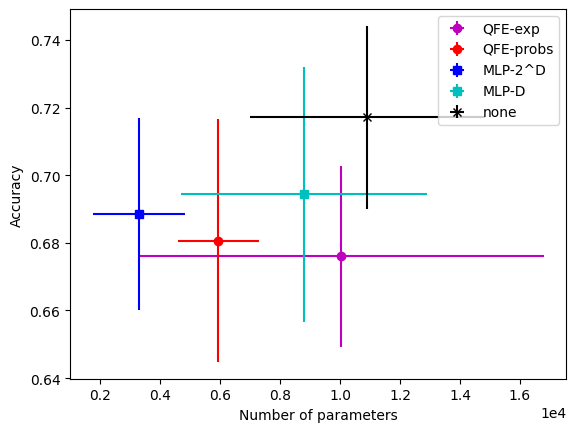

Dataset: ENZYMES, Utility Function: best_all


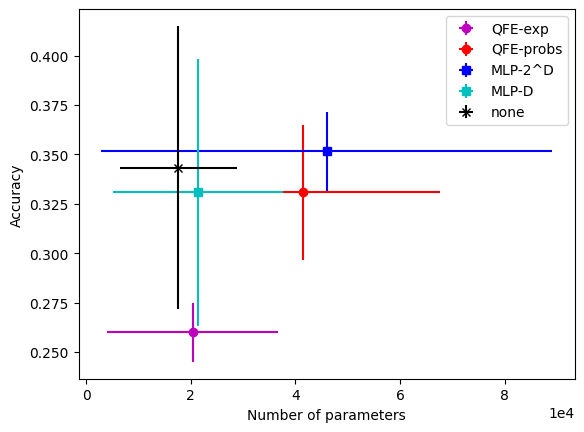

Dataset: ENZYMES, Utility Function: best_acc


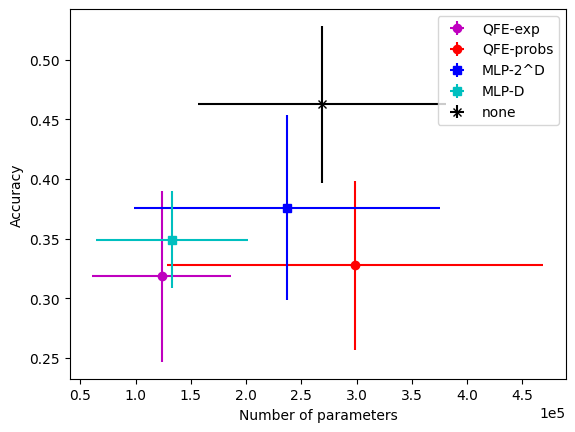

Dataset: ENZYMES, Utility Function: low_params


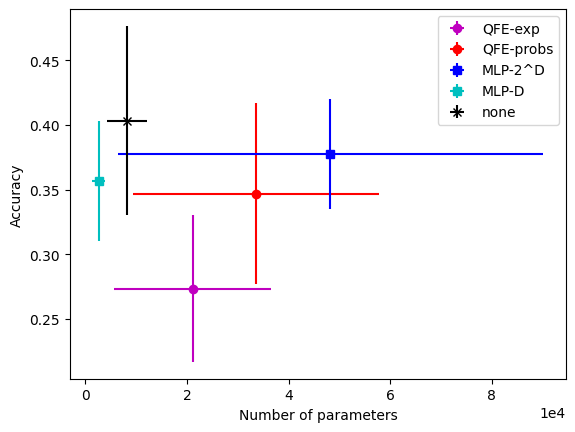

In [8]:
for ds, results in result_dict.items():
    for utility_fn in ["best_all", "best_acc", "low_params"]:
        print(f"Dataset: {ds}, Utility Function: {utility_fn}") 
        plot_stats(results, utility_fn, plot_file_name=f"{ds.value}-{utility_fn}")

In [5]:
mlp_d_xu_results = {
  Dataset.PROTEINS: [0.61, 0.65, 0.64],
  Dataset.ENZYMES: [0.14, 0.2, 0.18],
}

In [9]:
for op_fn, res in result_dict[Dataset.PROTEINS]["stats"]["MLP-D"].items(): 
  print(op_fn, res["accuracies"]["mean"], "\pm", res["accuracies"]["error"], ", Lower Bound:", res["accuracies"]["mean"] - res["accuracies"]["error"])

best_all 0.7063204460065446 \pm 0.03215973821354989 , Lower Bound: 0.6741607077929948
best_acc 0.7067567567567568 \pm 0.0311295600533269 , Lower Bound: 0.6756271967034299
low_params 0.6943804791338424 \pm 0.03765200177756234 , Lower Bound: 0.65672847735628


In [10]:
for op_fn, res in result_dict[Dataset.ENZYMES]["stats"]["MLP-D"].items(): 
  print(op_fn, res["accuracies"]["mean"], "\pm", res["accuracies"]["error"], ", Lower Bound:", res["accuracies"]["mean"] - res["accuracies"]["error"])

best_all 0.3308333333333333 \pm 0.0675 , Lower Bound: 0.2633333333333333
best_acc 0.3491666666666666 \pm 0.04083333333333336 , Lower Bound: 0.30833333333333324
low_params 0.35666666666666663 \pm 0.04666666666666669 , Lower Bound: 0.30999999999999994


## Build LaTeX tables

Hyperparameters Table

In [6]:
from IPython.display import display, Latex
from collections import defaultdict

In [7]:
Ti
    "qfe_layers": "QFE Layers",
    "layers": "MP Layers",
    "hidden": "MP Hidden Dimension",
    "dropout": "Dropout",
    "lr": "Learning Rate",
    "weight_decay": "Weight Decay",
}

latex_embedder_names = {
    "QFE-exp": "QFE-exp",
    "QFE-probs": "QFE-probs",
    "MLP-2^D": "MLP-$2^D$",
    "MLP-D": "MLP-$D$",
    "none": "None",
}

utility_fn_names = {
    "best_all": "Best All",
    "best_acc": "Best Accuracy",
    "low_params": "Low Params",
}

latex_col_settings = {
    "pooling": "l",
    "model": "p{1.8cm}",
    "qfe_layers": "p{1.4cm}",
    "layers": "p{1.4cm}",
    "hidden": "p{2.1cm}",
    "dropout": "l",
    "lr": "p{1.8cm}",
    "weight_decay": "p{1.8cm}",
}

In [19]:
ds = Dataset.ENZYMES
embedder = "none"

columns = result_dict[ds]["best_trials"][embedder]["best_all"][0]["params"].keys()

table_string = ""
table_string += "Fold\t" + "\t".join(map(lambda c: latex_col_names[c], columns)) + "\tTrainable Parameter Count\tVal. Accuracy (95% CI)\n"

for utility_fn in result_dict[ds]["best_trials"][embedder]:
    trials = result_dict[ds]["best_trials"][embedder][utility_fn]

    table_string += f"{utility_fn_names[utility_fn]}\n"

    for i, trial in enumerate(trials):
        params = {k: (f"{v:.2f}" if v > 0.01 else f"{v:.2e}") if type(v) == float else str(v) for k, v in trial["params"].items()}
        table_string += f"{i}\t" + "\t".join(map(lambda c: params[c], columns)) + f"\t{int(trial['validation_results'][2])}\t{trial['validation_results'][0]:.3f} +- {trial['validation_results'][1]:.3f}\n"

print(table_string)

Fold	Pooling	MP Model	MP Layers	MP Hidden Dimension	Dropout	Learning Rate	Weight Decay	Trainable Parameter Count	Val. Accuracy (95% CI)
Best All
0	max	GraphConv	2	157	0.35	8.32e-03	1.60e-05	3303	0.378 +- 0.022
1	sum	GraphConv	2	140	0.10	1.96e-03	8.54e-05	2946	0.271 +- 0.008
2	max	GraphSAGE	4	51	0.47	1.53e-03	1.80e-05	11583	0.456 +- 0.044
3	max	GraphConv	4	93	0.02	5.35e-03	7.87e-05	36741	0.357 +- 0.022
4	sum	GCN	6	73	0.06	1.17e-03	1.24e-05	22417	0.425 +- 0.021
Best Accuracy
0	sum	GraphSAGE	6	233	3.16e-03	8.67e-05	5.90e-05	440143	0.549 +- 0.032
1	sum	GraphSAGE	7	194	0.23	2.90e-04	2.96e-05	381410	0.520 +- 0.076
2	max	GraphSAGE	6	147	0.47	2.18e-03	1.80e-05	176553	0.480 +- 0.086
3	sum	GraphSAGE	8	155	0.27	5.86e-05	1.25e-04	292491	0.474 +- 0.055
4	max	GraphSAGE	4	135	4.69e-03	6.15e-04	9.74e-04	76011	0.480 +- 0.047
Low Params
0	max	GraphConv	2	226	0.39	8.32e-03	1.97e-05	4752	0.400 +- 0.040
1	sum	GraphSAGE	7	31	0.21	1.81e-03	7.62e-05	10422	0.456 +- 0.067
2	max	GraphSAGE	5	24	0.17	1.16e-03	1.02

In [23]:
ds = Dataset.ENZYMES

table_string = ""
table_string += "\tFold\t" + "\t".join(map(lambda i: f"{i}", range(5))) + "\tTrainable Parameter Count (95% CI)\tTest Accuracy (95% CI)\n"

for embedder, exps in result_dict[ds]["accuracies"].items():
    firstRow = True

    for utility_fn, accuracies in exps.items():
        if firstRow:
            table_string += f"{latex_embedder_names[embedder]}\t"
            firstRow = False
        else:
            table_string += "\t"

        final_results = result_dict[ds]['results'][embedder][utility_fn]
        table_string += f"{utility_fn_names[utility_fn]} \t" + "\t".join(map(lambda c: f"{accuracies[c]:.3f}", range(5))) + f"\t{final_results['size']:.1f} +- {final_results['size_error']:.1f}\t{final_results['accuracy']:.3f} +- {final_results['error']:.3f}\n"

print(table_string)

	Fold	0	1	2	3	4	Trainable Parameter Count (95% CI)	Test Accuracy (95% CI)
QFE-exp	Best All 	0.225	0.292	0.275	0.217	0.275	20328.9 +- 16294.9	0.254 +- 0.024
	Best Accuracy 	0.250	0.317	0.275	0.150	0.267	123728.4 +- 62862.4	0.239 +- 0.049
	Low Params 	0.242	0.292	0.300	0.250	0.250	20789.6 +- 15805.4	0.267 +- 0.020
QFE-probs	Best All 	0.300	0.383	0.283	0.250	0.400	41489.0 +- 26093.0	0.327 +- 0.050
	Best Accuracy 	0.333	0.367	0.250	0.250	0.358	293641.2 +- 164986.8	0.310 +- 0.043
	Low Params 	0.242	0.350	0.383	0.250	0.267	33982.1 +- 24587.3	0.302 +- 0.051
MLP-$2^D$	Best All 	0.350	0.375	0.167	0.283	0.333	45857.1 +- 42957.9	0.281 +- 0.068
	Best Accuracy 	0.317	0.367	0.317	0.383	0.233	238690.6 +- 140636.4	0.313 +- 0.047
	Low Params 	0.350	0.450	0.192	0.367	0.300	47412.1 +- 41231.7	0.323 +- 0.074
MLP-$D$	Best All 	0.208	0.367	0.233	0.275	0.483	21227.6 +- 16296.8	0.334 +- 0.094
	Best Accuracy 	0.250	0.417	0.400	0.392	0.392	133729.2 +- 67554.4	0.342 +- 0.062
	Low Params 	0.258	0.425	0.267	0.208	

LaTeX Tables

In [58]:
ds = Dataset.PROTEINS
embedder = "none"

columns = result_dict[ds]["best_trials"][embedder]["best_all"][0]["params"].keys()

latex_string = ""
latex_string += "\\begin{tabular}{| l | " + " ".join(latex_col_settings[c] for c in columns) + " | p{2cm} | p{2.6cm} |}\n"
latex_string += "\\hline\n"
latex_string += "\\textbf{Fold} & " + " & ".join(map(lambda c: f"\\textbf{{{latex_col_names[c]}}}", columns)) + " & \\textbf{Trainable Parameter Count} & \\textbf{Val. Accuracy (95\\% CI)} \\\\ \n" 

for utility_fn in result_dict[ds]["best_trials"][embedder]:
    trials = result_dict[ds]["best_trials"][embedder][utility_fn]

    latex_string += "\\hline\n"
    latex_string += f"\\multicolumn{{{len(columns)+3}}}{{|c|}}{{{utility_fn_names[utility_fn]}}} \\\\ \n"
    latex_string += "\\hline\n"

    for i, trial in enumerate(trials):
        params = {k: (f"{v:.2f}" if v > 0.01 else f"{v:.2e}") if type(v) == float else str(v) for k, v in trial["params"].items()}
        latex_string += f"{i} & " + " & ".join(map(lambda c: params[c], columns)) + f" & \\num[group-separator={{,}}]{{{int(trial['validation_results'][2])}}} & ${trial['validation_results'][0]:.3f} \\pm {trial['validation_results'][1]:.3f}$ \\\\ \n"

latex_string += "\\hline\n"
latex_string += "\\end{tabular}"

print(latex_string)

\begin{tabular}{| l | l p{1.8cm} p{1.4cm} p{2.1cm} l p{1.8cm} p{1.8cm} | p{2cm} | p{2.6cm} |}
\hline
\textbf{Fold} & \textbf{Pooling} & \textbf{MP Model} & \textbf{MP Layers} & \textbf{MP Hidden Dimension} & \textbf{Dropout} & \textbf{Learning Rate} & \textbf{Weight Decay} & \textbf{Trainable Parameter Count} & \textbf{Val. Accuracy (95\% CI)} \\ 
\hline
\multicolumn{10}{|c|}{Best All} \\ 
\hline
0 & max & GraphSAGE & 5 & 39 & 0.30 & 9.29e-04 & 1.42e-05 & \num[group-separator={,}]{9752} & $0.726 \pm 0.019$ \\ 
1 & mean & GCN & 16 & 30 & 0.23 & 4.82e-03 & 1.30e-04 & \num[group-separator={,}]{13232} & $0.705 \pm 0.005$ \\ 
2 & max & GCN & 13 & 32 & 0.41 & 3.33e-04 & 1.57e-04 & \num[group-separator={,}]{11842} & $0.730 \pm 0.014$ \\ 
3 & max & GCN & 16 & 67 & 0.42 & 1.44e-04 & 8.27e-05 & \num[group-separator={,}]{64255} & $0.725 \pm 0.010$ \\ 
4 & max & GraphSAGE & 2 & 129 & 0.13 & 1.77e-04 & 2.02e-05 & \num[group-separator={,}]{1679} & $0.695 \pm 0.011$ \\ 
\hline
\multicolumn{10}{|c|}{B

In [59]:
latex_string = ""
latex_string += "\\begin{tabular}{| l | l | " + " ".join(["l"]*5) + " | p{3.8cm} | p{2.6cm} |}\n"
latex_string += "\\hline\n"
latex_string += "\\multicolumn{2}{|r|}{\\textbf{Fold}} & " + " & ".join(map(lambda i: f"\\textbf{{{i}}}", range(5))) + " & \\textbf{Trainable Parameter Count (95\\% CI)} & \\textbf{Test Accuracy (95\\% CI)} \\\\ \n" 
latex_string += "\\hline\n"

for embedder, exps in result_dict[ds]["accuracies"].items():
    firstRow = True

    latex_string += "\\hline\n"

    for utility_fn, accuracies in exps.items():
        if firstRow:
            latex_string += f"\\multirow{{3}}{{*}}{{\\textbf{{{latex_embedder_names[embedder]}}}}} & "
            firstRow = False
        else:
            latex_string += " & "

        final_results = result_dict[ds]['results'][embedder][utility_fn]
        latex_string += f"\\textbf{{{utility_fn_names[utility_fn]}}} & " + " & ".join(map(lambda c: f"{accuracies[c]:.3f}", range(5))) + f" & $\\num[group-separator={{,}}]{{{final_results['size']:.1f}}} \\pm \\num[group-separator={{,}}]{{{final_results['size_error']:.1f}}}$ & ${final_results['accuracy']:.3f} \\pm {final_results['error']:.3f}$ \\\\ \n"

    latex_string += "\\hline\n"

latex_string += "\\end{tabular}"
print(latex_string)

\begin{tabular}{| l | l | l l l l l | p{3.8cm} | p{2.6cm} |}
\hline
\multicolumn{2}{|r|}{\textbf{Fold}} & \textbf{0} & \textbf{1} & \textbf{2} & \textbf{3} & \textbf{4} & \textbf{Trainable Parameter Count (95\% CI)} & \textbf{Test Accuracy (95\% CI)} \\ 
\hline
\hline
\multirow{3}{*}{\textbf{QFE-exp}} & \textbf{Best All} & 0.659 & 0.709 & 0.659 & 0.752 & 0.680 & $\num[group-separator={,}]{40064.9} \pm \num[group-separator={,}]{33555.3}$ & $0.698 \pm 0.031$ \\ 
 & \textbf{Best Accuracy} & 0.614 & 0.700 & 0.682 & 0.743 & 0.676 & $\num[group-separator={,}]{238153.8} \pm \num[group-separator={,}]{199791.0}$ & $0.681 \pm 0.037$ \\ 
 & \textbf{Low Params} & 0.583 & 0.700 & 0.659 & 0.653 & 0.676 & $\num[group-separator={,}]{10022.8} \pm \num[group-separator={,}]{6767.0}$ & $0.646 \pm 0.035$ \\ 
\hline
\hline
\multirow{3}{*}{\textbf{QFE-probs}} & \textbf{Best All} & 0.637 & 0.713 & 0.740 & 0.671 & 0.712 & $\num[group-separator={,}]{40452.7} \pm \num[group-separator={,}]{30517.1}$ & $0.689 \pm 